## Import lib

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [296]:
os.chdir('C:/Storage/StudyJourney/Nam3/Cs114/Project2')

## Read data

In [297]:
# Đọc dữ liệu
annonimized = pd.read_csv("Dataset/annonimized.csv")
tbtl = pd.read_excel("Dataset/public_it001/tbtl-public.ods", engine='odf')
th = pd.read_csv("Dataset/public_it001/th-public.csv")
qt = pd.read_csv("Dataset/public_it001/qt-public.csv")
CK = pd.read_csv("Dataset/public_it001/ck-public.csv")

## Xử lý dữ liệu annonimized

In [298]:
annonimized

,assignment_id,problem_id,username,is_final,status,pre_score,coefficient,language_id,created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10/9/2025 8:02,10/9/2025 8:06,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10/9/2025 8:04,10/9/2025 8:04,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10/9/2025 8:06,10/9/2025 8:06,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10/9/2025 8:47,10/9/2025 8:48,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10/9/2025 9:19,10/9/2025 9:19,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
...,...,...,...,...,...,...,...,...,...,...,...
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,1/15/2025 16:03,1/15/2025 16:03,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":..."
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,0,100,it0012,1/15/2025 16:04,1/15/2025 16:05,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func..."
295195,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,1/15/2025 16:04,1/15/2025 16:05,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":..."
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,1/15/2025 16:05,1/15/2025 16:05,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":[0..."


In [299]:
print(annonimized['status'].unique())

['SCORE' 'Compilation Error' 'pending' 'Syntax Error']


In [300]:
print(annonimized.dtypes)

assignment_id    object
problem_id       object
username         object
is_final          int64
status           object
pre_score         int64
coefficient       int64
language_id      object
created_at       object
updated_at       object
judgement        object
dtype: object


### Feature Engineering

In [301]:
# Hàm xử lý cột `judgement` để rút trích các đặc trưng
import json

def extract_judgement_features(df):
    # Parse cột judgement thành dict với kiểm tra ngoại lệ
    def safe_json_loads(j):
        try:
            return json.loads(j) if isinstance(j, str) else {}
        except json.JSONDecodeError:
            return {}

    # Chuyển cột judgement sang dạng dict
    df['judgement_parsed'] = df['judgement'].apply(safe_json_loads)
    
    # Rút trích các giá trị từ judgement
    df['times'] = df['judgement_parsed'].apply(lambda x: x.get('times', []) if isinstance(x, dict) else [])
    df['mems'] = df['judgement_parsed'].apply(lambda x: x.get('mems', []) if isinstance(x, dict) else [])
    
    # Kiểm tra kiểu của verdicts và xử lý
    def extract_verdicts(verdicts):
        if isinstance(verdicts, dict):
            return verdicts.get('WRONG', 0)
        return 0  # Mặc định nếu verdicts không phải là dict

    df['verdicts'] = df['judgement_parsed'].apply(lambda x: x.get('verdicts', {}) if isinstance(x, dict) else {})
    df['wrong_testcases'] = df['verdicts'].apply(extract_verdicts)

    return df

# Hàm tạo các cột mới từ times và mems
def process_times_and_mems(df):
    df['times_mean'] = df['times'].apply(lambda x: sum(x) / len(x) if x else -1)
    df['mems_mean'] = df['mems'].apply(lambda x: sum(x) / len(x) if x else -1)
    df['times_max'] = df['times'].apply(lambda x: max(x) if x else -1)
    df['times_min'] = df['times'].apply(lambda x: min(x) if x else -1)
    df['mems_max'] = df['mems'].apply(lambda x: max(x) if x else -1)
    df['mems_min'] = df['mems'].apply(lambda x: min(x) if x else -1)
    df['times_sum'] = df['times'].apply(lambda x: sum(x) if x else 0)
    df['mems_sum'] = df['mems'].apply(lambda x: sum(x) if x else 0)

    return df

# Tính tổng các đặc trưng theo username
def aggregate_features_by_username(df):
    agg_features = [
        'times_mean', 'times_max', 'times_sum', 
        'mems_mean', 'mems_max', 'mems_sum', 
        'wrong_testcases'
    ]
    for col in agg_features:
        df[col] = df.groupby('username')[col].transform('sum')

    return df

In [302]:
# Bỏ cột không cần thiết
annonimized.drop(columns=['language_id'], inplace=True)

label_encoder = LabelEncoder()

annonimized['status_encoded'] = label_encoder.fit_transform(annonimized['status'])

# # Mã hóa cột status: 'SCORE' -> 1, các giá trị khác -> 0
# annonimized['status'] = annonimized['status'].apply(lambda x: 1 if x == 'SCORE' else 0)

# Chuyển đổi created_at và updated_at sang datetime
annonimized['created_at'] = pd.to_datetime(annonimized['created_at'], errors='coerce')
annonimized['updated_at'] = pd.to_datetime(annonimized['updated_at'], errors='coerce')

# Tạo đặc trưng mới duration
annonimized['duration'] = (annonimized['updated_at'] - annonimized['created_at']).dt.total_seconds()
annonimized['duration'] = annonimized['duration'].fillna(0)

# Đếm số dòng trùng lặp dựa trên username, assignment_id, problem_id
duplicate_counts = annonimized.groupby(['username', 'assignment_id', 'problem_id']).size()
annonimized['duplicate_count'] = annonimized.apply(
    lambda row: duplicate_counts.get((row['username'], row['assignment_id'], row['problem_id']), 0), axis=1
)

# Tổng duplicate_count theo username
annonimized['duplicate_count_sum'] = annonimized.groupby('username')['duplicate_count'].transform('sum')

# Tính thêm các đặc trưng
annonimized['is_final_sum'] = annonimized.groupby('username')['is_final'].transform('sum')
annonimized['status_sum'] = annonimized.groupby('username')['status'].transform('sum')

# Chuẩn hóa tỷ lệ status và is_final
annonimized['status_encoded'] = annonimized['status_encoded'].values / (annonimized['duplicate_count'] + 1e-5)
annonimized['is_final'] = annonimized['is_final'] / (annonimized['duplicate_count'] + 1e-5)

# Tạo đặc trưng pre_score_coefficient_product
annonimized['pre_score_coefficient_product'] = (
    annonimized['pre_score'] * annonimized['coefficient']
)
annonimized['pre_score_coefficient_product'] = (
    annonimized.groupby('username')['pre_score_coefficient_product'].transform('sum')
)

# Rút trích các đặc trưng từ cột judgement
annonimized = extract_judgement_features(annonimized)
annonimized = process_times_and_mems(annonimized)
annonimized = aggregate_features_by_username(annonimized)

annonimized = annonimized.groupby('username').agg({
    'status_encoded': 'mean',
    'is_final': 'mean',
    'duplicate_count_sum': 'first',
    'duration': 'mean',
    'wrong_testcases': 'mean',
    'times_max': 'mean',
    'mems_max': 'mean',
    'times_sum': 'mean',
    'mems_sum': 'mean',
    'times_mean': 'mean',
    'mems_mean': 'mean',
    'is_final_sum': 'mean',
    'status_sum': 'mean',
    'pre_score_coefficient_product': 'mean'
}).reset_index()


# Lưu các đặc trưng cần thiết
features = [
    'username', 'is_final', 'duplicate_count_sum', 'duration',
    'wrong_testcases', 'times_max', 'mems_max', 'times_sum', 'mems_sum',
    'times_mean', 'mems_mean', 'is_final_sum', 'status_sum', 'pre_score_coefficient_product', 'status_encoded'
]

features_nouser = [
    'is_final', 'duplicate_count_sum', 'duration',
    'wrong_testcases', 'times_max', 'mems_max', 'times_sum', 'mems_sum',
    'times_mean', 'mems_mean', 'is_final_sum', 'status_sum', 'pre_score_coefficient_product', 'status_encoded'
]
annonimized = annonimized[features]


TypeError: agg function failed [how->mean,dtype->object]

## data TBTL

In [247]:
# Merge dữ liệu bằng username từ annonimized và tbtl
data_tbtl = annonimized.merge(tbtl, on="username", how="left")

In [248]:
data_tbtl['TBTL'] = data_tbtl.groupby('username')['TBTL'].mean().values

In [249]:
# Phân tách dữ liệu
train_test_data_tbtl = data_tbtl[data_tbtl['TBTL'].notna()]  # Sinh viên có điểm dùng để train
predict_data_tbtl = data_tbtl[data_tbtl['TBTL'].isna()]  # Sinh viên không có điểm dùng để dự đoán

# In số lượng
print(f"Số lượng sinh viên có điểm (train): {train_test_data_tbtl.shape[0]}")
print(f"Số lượng sinh viên cần dự đoán: {predict_data_tbtl.shape[0]}")

Số lượng sinh viên có điểm (train): 799
Số lượng sinh viên cần dự đoán: 690


### Train test data tbtl

In [250]:
X_train_test_data_tbtl = train_test_data_tbtl[features_nouser]
y_train_test_data_tbtl = train_test_data_tbtl['TBTL']

In [251]:
nan_columns = X_train_test_data_tbtl.columns[X_train_test_data_tbtl.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_train_test_data_tbtl.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_train_test_data_tbtl[nan_columns] = X_train_test_data_tbtl[nan_columns].fillna(X_train_test_data_tbtl[nan_columns].mean())

Các cột chứa NaN: []
Số lượng NaN trong mỗi cột:
Series([], dtype: int64)


In [252]:
X_train_test_data_tbtl

,is_final,duplicate_count_sum,duration,wrong_testcases,times_max,mems_max,times_sum,mems_sum,times_mean,mems_mean,is_final_sum,status_sum,pre_score_coefficient_product
0,0.551667,147,16.595745,11.0,0.82,13740.0,7.69,97320.0,0.308842,4418.443956,46.0,47.0,46607100.0
1,0.547083,259,936.153846,9.0,-0.14,12487.0,9.93,108180.0,-0.617374,5762.701099,78.0,77.0,75249900.0
2,0.731160,195,14.117647,135.0,0.30,17523.0,4.87,55076.0,-0.656128,4628.780952,67.0,67.0,62951400.0
3,0.729469,100,8.936170,0.0,0.36,8956.0,0.38,11656.0,0.042286,1395.885714,47.0,47.0,47000000.0
4,0.833494,107,11.818182,25.0,3.06,11904.0,30.39,240064.0,1.523212,8784.344554,66.0,66.0,60251900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.642428,111,10.666667,26.0,0.57,7320.0,0.59,9888.0,0.062429,1327.542857,44.0,45.0,42400000.0
797,0.562274,357,12.115385,2.0,1.06,10236.0,15.08,46624.0,0.594176,2903.326007,104.0,104.0,103184600.0
798,0.735943,155,5.660377,16.0,-2.46,3965.0,2.86,27776.0,-2.761667,2311.666667,53.0,50.0,48066600.0
799,0.457073,557,650.608696,11.0,-1.28,22445.0,13.03,191676.0,-2.360293,8717.012724,115.0,112.0,110600000.0


In [253]:
#Chuẩn hóa dữ liệu
# scaler = StandardScaler()
# X_train_test_data_tbtl = scaler.fit_transform(X_train_test_data_tbtl)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_train_test_data_tbtl, y_train_test_data_tbtl, test_size=0.2, random_state=42)

In [254]:
X_train

,is_final,duplicate_count_sum,duration,wrong_testcases,times_max,mems_max,times_sum,mems_sum,times_mean,mems_mean,is_final_sum,status_sum,pre_score_coefficient_product
264,0.694819,99,8.000000,92.0,-2.81,12332.0,4.23,91616.0,-3.640090,8715.015385,45.0,41.0,28143000.0
616,0.699995,8,0.000000,0.0,-5.00,-5.0,0.00,0.0,-5.000000,-5.000000,5.0,0.0,0.0
329,0.377093,279,8.372093,18.0,-0.96,16562.0,9.02,139360.0,-1.610148,7416.139194,43.0,41.0,39326500.0
342,0.594321,231,7.297297,24.0,1.46,16308.0,13.40,106768.0,0.508318,4911.580488,74.0,74.0,72519000.0
395,0.537206,294,7.578947,28.0,-0.68,22247.0,0.38,26864.0,-0.958286,3010.638095,95.0,94.0,91250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.713800,200,11.287129,19.0,-5.64,9062.0,0.38,11760.0,-5.957286,1503.942857,101.0,95.0,93100000.0
106,0.611122,163,3.600000,0.0,0.25,1984.0,0.25,1984.0,0.025000,198.400000,50.0,50.0,50000000.0
270,0.625517,489,13.082707,45.0,1.03,25621.0,62.54,272100.0,-0.948733,10464.729092,133.0,130.0,125091600.0
436,0.419776,161,7.058824,94.0,-3.00,12025.0,0.00,164424.0,-3.000000,11741.571429,34.0,31.0,22520500.0


In [255]:
y_train 

264    7.10
616    8.21
329    8.06
342    7.15
395    7.73
       ... 
71     7.11
106    7.93
270    9.15
436    7.32
102    8.10
Name: TBTL, Length: 639, dtype: float64

In [262]:
# Huấn luyện và đánh giá mô hình
models = {
    'LinearRegression': LinearRegression(),
    # 'RandomForest': RandomForestRegressor(random_state=42),
    # 'XGBoost': XGBRegressor(random_state=42)
}

metrics = {}

for name, model in models.items():
    # Huấn luyện
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Đánh giá
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics[name] = {
        'MSE': mse,
        'R2': r2
    }

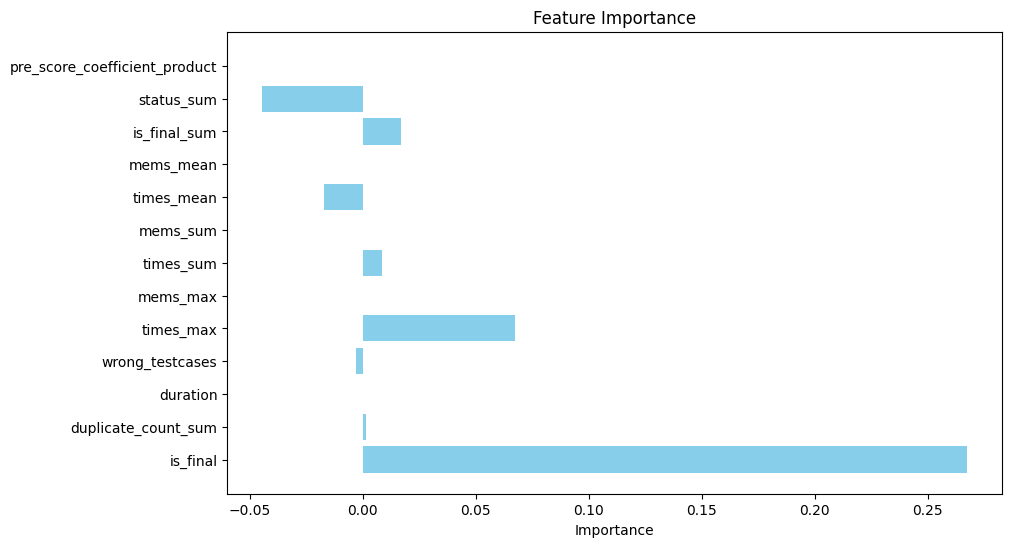

In [ ]:
# Mức độ quan trọng của các đặc trưng
# importances = model.coef_
# features = X_train_test_data_tbtl.columns

# # Vẽ biểu đồ mức độ quan trọng
# plt.figure(figsize=(10, 6))
# plt.barh(features, importances, color='skyblue')
# plt.xlabel('Importance')
# plt.title('Feature Importance')
# plt.show()

In [258]:
# In kết quả
print("Model Evaluation Results of TBTL:")
for name, metrics in metrics.items():
    print(f"{name}: MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")

Model Evaluation Results of TBTL:
LinearRegression: MSE=0.8222, R2=0.0172


### Predict data tbtl

In [259]:
X_predict_data_tbtl = predict_data_tbtl[features_nouser]

In [260]:
nan_columns = X_predict_data_tbtl.columns[X_predict_data_tbtl.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_predict_data_tbtl.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_predict_data_tbtl[nan_columns] = X_predict_data_tbtl[nan_columns].fillna(X_predict_data_tbtl[nan_columns].mean())

Các cột chứa NaN: []
Số lượng NaN trong mỗi cột:
Series([], dtype: int64)


In [261]:
X_predict_data_tbtl = scaler.transform(X_predict_data_tbtl)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- status


In [198]:
# Dự đoán
predict_data_tbtl['TBTL'] = model.predict(X_predict_data_tbtl)


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_216564\3950690568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data_tbtl['TBTL'] = model.predict(X_predict_data_tbtl)


In [199]:

output = predict_data_tbtl[['username', 'TBTL']]

# Xuất file kết quả
output = output.to_csv("Predict/predicted_tbtl.csv", index=False)

## data TH


### Train test data th

In [200]:
# Merge dữ liệu bằng username từ annonimized và th
data_th = annonimized.merge(th, on="username", how="left")

In [201]:
data_th['TH'] = pd.to_numeric(data_th['TH'], errors='coerce')
data_th['TH'] = data_th.groupby('username')['TH'].mean().values

In [202]:
# Phân tách dữ liệu
train_test_data_th = data_th[data_th['TH'].notna()]  # Sinh viên có điểm dùng để train
predict_data_th = data_th[data_th['TH'].isna()]  # Sinh viên không có điểm dùng để dự đoán

# In số lượng
print(f"Số lượng sinh viên có điểm (train): {train_test_data_th.shape[0]}")
print(f"Số lượng sinh viên cần dự đoán: {predict_data_th.shape[0]}")

Số lượng sinh viên có điểm (train): 753
Số lượng sinh viên cần dự đoán: 736


### Train test data th

In [203]:
X_train_test_data_th = train_test_data_th[features_nouser]
y_train_test_data_th = train_test_data_th['TH']

In [204]:
nan_columns = X_train_test_data_th.columns[X_train_test_data_th.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_train_test_data_th.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_train_test_data_th[nan_columns] = X_train_test_data_th[nan_columns].fillna(X_train_test_data_th[nan_columns].mean())

Các cột chứa NaN: []
Số lượng NaN trong mỗi cột:
Series([], dtype: int64)


In [205]:
#Chuẩn hóa dữ liệu
X_train_test_data_th = scaler.fit_transform(X_train_test_data_th)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_train_test_data_th, y_train_test_data_th, test_size=0.2, random_state=42)

In [206]:
# Huấn luyện và đánh giá mô hình
models = {
    'LinearRegression': LinearRegression(),
    # 'RandomForest': RandomForestRegressor(random_state=42),
    # 'XGBoost': XGBRegressor(random_state=42)
}

metrics = {}

for name, model in models.items():
    # Huấn luyện
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Đánh giá
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics[name] = {
        'MSE': mse,
        'R2': r2
    }

In [207]:
# In kết quả
print("Model Evaluation Results of TH:")
for name, metrics in metrics.items():
    print(f"{name}: MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")

Model Evaluation Results of TH:
LinearRegression: MSE=3.9233, R2=0.2271


### Predict data th

In [208]:
X_predict_data_th = predict_data_th[features_nouser]

In [209]:
nan_columns = X_predict_data_th.columns[X_predict_data_th.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_predict_data_th.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_predict_data_th[nan_columns] = X_predict_data_th[nan_columns].fillna(X_predict_data_th[nan_columns].mean())

Các cột chứa NaN: []
Số lượng NaN trong mỗi cột:
Series([], dtype: int64)


In [210]:
X_predict_data_th = scaler.transform(X_predict_data_th)

In [211]:
# Dự đoán
predict_data_th['TH'] = model.predict(X_predict_data_th)

C:\Users\Admin\AppData\Local\Temp\ipykernel_216564\1421566909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data_th['TH'] = model.predict(X_predict_data_th)


In [212]:

output = predict_data_th[['username', 'TH']]

# Xuất file kết quả
output = output.to_csv("Predict/predicted_th.csv", index=False)

## data QT

In [213]:
# Merge dữ liệu bằng username từ annonimized và qt
data_qt = annonimized.merge(qt, on="username", how="left")

In [214]:
data_qt['QT'] = pd.to_numeric(data_qt['QT'], errors='coerce')
data_qt['QT'] = data_qt.groupby('username')['QT'].mean().values

In [215]:
# Phân tách dữ liệu
train_test_data_qt = data_qt[data_qt['QT'].notna()]  # Sinh viên có điểm dùng để train
predict_data_qt = data_qt[data_qt['QT'].isna()]  # Sinh viên không có điểm dùng để dự đoán

# In số lượng
print(f"Số lượng sinh viên có điểm (train): {train_test_data_qt.shape[0]}")
print(f"Số lượng sinh viên cần dự đoán: {predict_data_qt.shape[0]}")

Số lượng sinh viên có điểm (train): 754
Số lượng sinh viên cần dự đoán: 735


### Train test data qt

In [216]:
X_train_test_data_qt = train_test_data_qt[features_nouser]
y_train_test_data_qt = train_test_data_qt['QT']

In [217]:
# fill NaN
nan_columns = X_train_test_data_qt.columns[X_train_test_data_qt.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_train_test_data_qt.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_train_test_data_qt[nan_columns] = X_train_test_data_qt[nan_columns].fillna(X_train_test_data_qt[nan_columns].mean())

Các cột chứa NaN: []
Số lượng NaN trong mỗi cột:
Series([], dtype: int64)


In [218]:
#Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_test_data_qt = scaler.fit_transform(X_train_test_data_qt)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_train_test_data_qt, y_train_test_data_qt, test_size=0.2, random_state=42)

In [219]:
# Huấn luyện và đánh giá mô hình
models = {
    'LinearRegression': LinearRegression(),
    # 'RandomForest': RandomForestRegressor(random_state=42),
    # 'XGBoost': XGBRegressor(random_state=42)
}

metrics = {}

for name, model in models.items():
    # Huấn luyện
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Đánh giá
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics[name] = {
        'MSE': mse,
        'R2': r2
    }

In [220]:
# In kết quả
print("Model Evaluation Results of QT:")
for name, metrics in metrics.items():
    print(f"{name}: MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")

Model Evaluation Results of QT:
LinearRegression: MSE=2.5157, R2=-0.0626


### Predict data qt

In [221]:
X_predict_data_qt = predict_data_qt[features_nouser]

In [222]:
nan_columns = X_predict_data_qt.columns[X_predict_data_qt.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_predict_data_qt.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_predict_data_qt[nan_columns] = X_predict_data_qt[nan_columns].fillna(X_predict_data_qt[nan_columns].mean())

Các cột chứa NaN: []
Số lượng NaN trong mỗi cột:
Series([], dtype: int64)


In [223]:
X_predict_data_qt = scaler.transform(X_predict_data_qt)

In [224]:
# Dự đoán
predict_data_qt['QT'] = model.predict(X_predict_data_qt)


C:\Users\Admin\AppData\Local\Temp\ipykernel_216564\3031361918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data_qt['QT'] = model.predict(X_predict_data_qt)


In [225]:

output = predict_data_qt[['username', 'QT']]

# Xuất file kết quả
output = output.to_csv("Predict/predicted_qt.csv", index=False)

## data CK

In [226]:
# Merge dữ liệu bằng username từ annonimized và ck
data_CK = annonimized.merge(CK, on="username", how="left")

In [227]:
data_CK['CK'] = data_CK.groupby('username')['CK'].mean().values

In [228]:
# Phân tách dữ liệu
train_test_data_ck = data_CK[data_CK['CK'].notna()]  # Sinh viên có điểm dùng để train
predict_data_ck = data_CK[data_CK['CK'].isna()]  # Sinh viên không có điểm dùng để dự đoán

# In số lượng
print(f"Số lượng sinh viên có điểm (train): {train_test_data_ck.shape[0]}")
print(f"Số lượng sinh viên cần dự đoán: {predict_data_ck.shape[0]}")

Số lượng sinh viên có điểm (train): 755
Số lượng sinh viên cần dự đoán: 734


In [229]:
X_train_test_data_ck = train_test_data_ck[features_nouser]
y_train_test_data_ck = train_test_data_ck['CK']

In [230]:
nan_columns = X_train_test_data_ck.columns[X_train_test_data_ck.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_train_test_data_ck.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_train_test_data_ck[nan_columns] = X_train_test_data_ck[nan_columns].fillna(X_train_test_data_ck[nan_columns].mean())

Các cột chứa NaN: []
Số lượng NaN trong mỗi cột:
Series([], dtype: int64)


In [231]:
#Chuẩn hóa dữ liệu
X_train_test_data_ck = scaler.fit_transform(X_train_test_data_ck)

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_train_test_data_ck, y_train_test_data_ck, test_size=0.2, random_state=42)

In [232]:
# Huấn luyện và đánh giá mô hình
models = {
    'LinearRegression': LinearRegression(),
    # 'RandomForest': RandomForestRegressor(random_state=42),
    # 'XGBoost': XGBRegressor(random_state=42)
}

metrics = {}

for name, model in models.items():
    # Huấn luyện
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Đánh giá
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metrics[name] = {
        'MSE': mse,
        'R2': r2
    }

In [233]:
# In kết quả
print("Model Evaluation Results of CK:")
for name, metrics in metrics.items():
    print(f"{name}: MSE={metrics['MSE']:.4f}, R2={metrics['R2']:.4f}")

Model Evaluation Results of CK:
LinearRegression: MSE=3.2836, R2=0.1898


### Predict data ck

In [234]:
X_predict_data_ck = predict_data_ck[features_nouser]

In [235]:
nan_columns = X_predict_data_ck.columns[X_predict_data_ck.isna().any()]
print(f"Các cột chứa NaN: {nan_columns.tolist()}")
nan_counts = X_predict_data_ck.isna().sum()
print("Số lượng NaN trong mỗi cột:")
print(nan_counts[nan_counts > 0])
X_predict_data_ck[nan_columns] = X_predict_data_ck[nan_columns].fillna(X_predict_data_ck[nan_columns].mean())

Các cột chứa NaN: []
Số lượng NaN trong mỗi cột:
Series([], dtype: int64)


In [236]:
X_predict_data_ck = scaler.transform(X_predict_data_ck)

In [237]:
# Dự đoán
predict_data_ck['CK'] = model.predict(X_predict_data_ck)

C:\Users\Admin\AppData\Local\Temp\ipykernel_216564\3428818030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data_ck['CK'] = model.predict(X_predict_data_ck)


In [238]:

output = predict_data_ck[['username', 'CK']]

# Xuất file kết quả
output = output.to_csv("Predict/predicted_ck.csv", index=False)